# Statystyczne metody przetwarzania danych 

## Laboratorium 1 - algorytm Najbliższego Sąsiada (NN)


### Opis

Celem jest zbadanie danych i opracowanie algorytmu klasyfikacji liści. Do tego celu należy zaimplementować i zastosować klasyfikator najbliższego sąsiada - NN (Nearest Neighbor).

### Termin
Zadanie należy wykonać w trakcie trwania laboratorium.

### System oceniania

| Liczba punktów (procentowo) | Ocena |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Punkty ujemne</u>

* `ocena - 0.5` jeżeli zadanie wysłano po laboratorium, ale < 7 dni; 
* `ocena - 1` jeżeli zadanie wysłano w terminie pomiędzy 7 a 14 dni;
* `ocena - 1.5` jeżeli zadanie wysłano po upływie 14 dni, ale przed ostatnim laboratorium;
* `ocena = 2` jeżeli zadanie wysłano po ostatnim laboratorium.

<u>Uwaga:</u>

Niedopuszczalne jest dzielenie się notatnikiem (plik `.ipynb`) z innymi studentami ani udostępnianie go w Internecie. Każdy student powinien pobrać notatnik samodzielnie z platformy WIKAMP.
Wysyłając zadanie potwierdasz, że wykonałeś je samodzielnie i jest to Twoja indywidualna praca a materiał przedstawiony w tej pracy jest dla Ciebie zrozumiały. Prace bardzo podobne albo grupowe będą uznawane za plagiat.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab01.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Dodatkowe narzędzia

Dopuszczalne jest korzystanie z bibliotek: `numpy`, `pandas`, `matplotlib`.
Implementacja klasyfikatora powinna być wykonana samodzielnie (bez dodatkowych bibliotek).



### Zadanie 1

Wczytaj dane z pliku `dataset.npz`. Plik ten zawiera zbiór danych podzielony na dwa podzbiory: treningowy `train` i testowy `test`. Każdy z nich zawiera cechy oraz indeksy klas. Dokładny opis zbioru danych znajduje się w pliku `ReadMe.pdf`.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
```

In [1]:
# >>> UZUPEŁNIJ KOMÓRKĘ <<<
import numpy as np

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
    print('Number of samples in train set: ' + str(len(train)))
    print('Number of samples in test set: ' + str(len(test)))

Number of samples in train set: 2244
Number of samples in test set: 1496


### Zadanie 2

Sprawdź: 
* ile jest wszystkich próbek z zbiorze, 
* ile jest próbek w poszczegónych klasach.

Czy zauważyłeś jakieś problemy związane z tym zbiorem danych?

In [2]:
"""
<TU ODPOWIEDZ NA PYTANIE>
Nie wszytskie klasy są reprezentowane przez próbki obecne w zbiorach. Dodatkową wadą tych zbiorów jest nierówna reprezentacja próbek różnych klas.
"""

def get_grouped_set_dict(dataset):
    grouped_dict = {}
    for element in dataset:
        if element[0] in grouped_dict:
            grouped_dict[element[0]].append(element)
        else:
            grouped_dict[element[0]] = [element]
    for key in grouped_dict.keys():
        grouped_dict[key] = np.asarray(grouped_dict[key])
    return grouped_dict

print('No. of samples in classes - train set:')
grouped_train_dict = get_grouped_set_dict(train)
for k in sorted(grouped_train_dict):
    print(str(k) + '  ' + str(len(grouped_train_dict[k])))
print('No. of samples in classes - test set:')
grouped_test_dict = get_grouped_set_dict(test)
for k in sorted(grouped_test_dict):
    print(str(k) + '  ' + str(len(grouped_test_dict[k])))


No. of samples in classes - train set:
1.0  77
2.0  66
3.0  55
4.0  66
5.0  77
6.0  44
7.0  44
8.0  33
9.0  121
10.0  88
11.0  88
12.0  77
13.0  99
14.0  66
15.0  66
22.0  121
23.0  77
24.0  77
25.0  66
26.0  99
27.0  55
28.0  66
29.0  110
30.0  77
31.0  77
32.0  66
33.0  66
34.0  99
35.0  88
36.0  33
No. of samples in classes - test set:
1.0  55
2.0  44
3.0  55
4.0  22
5.0  55
6.0  44
7.0  66
8.0  88
9.0  33
10.0  55
11.0  88
12.0  55
13.0  44
14.0  66
15.0  44
22.0  11
23.0  44
24.0  66
25.0  33
26.0  33
27.0  66
28.0  66
29.0  22
30.0  55
31.0  44
32.0  55
33.0  55
34.0  22
35.0  33
36.0  77


### Zadanie 3

Wybierz obserwacje należące do poniższych klas (rodzaje liści):
* `Populus nigra` - klasa nr 3, 
* `Quercus robur` - klasa nr 5.


In [3]:
# >>> UZUPEŁNIJ KOMÓRKĘ <<<
train_two_classes = train[((train[:,0] == 3) | (train[:,0] == 5))]
test_two_classes = test[((test[:,0] == 3) | (test[:,0] == 5))]
print("Samples from train set")
grouped_two_classes_train_dict = get_grouped_set_dict(train_two_classes)
print(grouped_two_classes_train_dict)
print("Samples from test set")
grouped_two_classes_test_dict = get_grouped_set_dict(test_two_classes)
print(grouped_two_classes_test_dict)

Samples from train set
{5.0: array([[5.00000000e+00, 4.00000000e+00, 9.36710000e-01, ...,
        3.99830000e-03, 3.72160000e-04, 1.30830000e+00],
       [5.00000000e+00, 6.00000000e+00, 9.09440000e-01, ...,
        2.89130000e-03, 2.93660000e-04, 1.16020000e+00],
       [5.00000000e+00, 2.00000000e+00, 8.80750000e-01, ...,
        2.75900000e-03, 2.58020000e-04, 1.09520000e+00],
       ...,
       [5.00000000e+00, 5.00000000e+00, 8.57689969e-01, ...,
        8.25530965e-03, 2.85122905e-04, 1.36499043e+00],
       [5.00000000e+00, 9.00000000e+00, 9.71130992e-01, ...,
        7.65297405e-03, 2.03654628e-04, 1.48339348e+00],
       [5.00000000e+00, 1.00000000e+01, 7.75259126e-01, ...,
        1.09847591e-02, 2.07598784e-04, 1.27284413e+00]]), 3.0: array([[3.00000000e+00, 8.00000000e+00, 5.65990000e-01, 1.04270000e+00,
        3.53180000e-01, 8.90860000e-01, 9.98250000e-01, 6.20680000e-01,
        3.29710000e-02, 1.97850000e-01, 2.63480000e-02, 1.05890000e-01,
        1.10880000e-02, 4.65

### Zadanie 4

A) Wybierz dwie dowolne cechy (*features*).<br />
B) Przedstaw graficznie próbki - na osi X i Y wartości wybranych wyżej cech.

Poniższy kod importuje kolekcję funkcji przydatnych do wizualizacji z biblioteki `matplotlib` (*info: zwróć uwagę, że nadano alias `plt`*).

```python
import matplotlib.pyplot as plt
```

Możesz wykorzystać funkcje `plt.figure`, `plt.scatter`, `plt.legend`, `plt.title`, `plt.xlabel` i `plt.ylabel` w celu wykonania tego zadania.

* Scatter: <https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html>
* Pyplot: <https://matplotlib.org/tutorials/introductory/pyplot.html>

>Ważne: Pamiętaj, że każdy przedstawiony wykres powinien być czytelny i posiadać następujące elementy:
* tytuł,
* opisy wszystkich osi,
* legendę.

> **Przykład**:
```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 1")
plt.ylabel(f"Cecha 2")
samples = np.random.rand(2, 20, 2)
samples[0] = samples[0]-0.5
samples[1] = samples[1]+0.5
for idx, sample in enumerate(samples):
    plt.scatter(x=sample[:, 0], y=sample[:, 1], label=idx)
plt.legend()
```
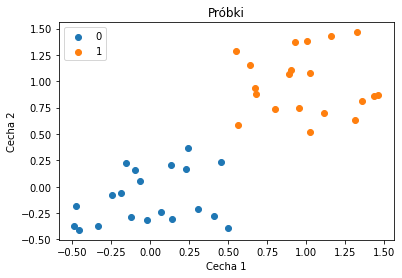


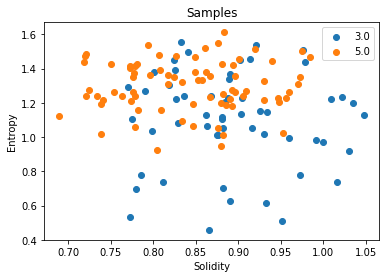

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Samples")
plt.xlabel(f"Solidity")
plt.ylabel(f"Entropy")
for k in sorted(grouped_two_classes_train_dict.keys()):
    plt.scatter(x=grouped_two_classes_train_dict[k][:, 5], y=grouped_two_classes_train_dict[k][:, 15], label=str(k))
plt.legend()

### Zadanie 5

Zaimplementuj klasyfikator najbliższego sąsiada NN i uruchom predykcję na zbiorze testowym.

> Podpowiedź: Dla każdej obserwacji ze zbioru `test` należy odnaleźć najbliższego sąsiada w zbiorze `train` i zaklasyfikować obserwację do klasy najbliższego sąsiada.


In [5]:
# >>> UZUPEŁNIJ KOMÓRKĘ <<<
import math


class TestSample:
    classified_as = None
    value = None

    def __init__(self, value, classified_as):
        self.value = value
        self.classified_as = classified_as

    def is_properly_classified(self):
        return self.value[0] == self.classified_as


def euclidian_dist(sample1, sample2, features_list):
    value = 0
    for feature in features_list:
        value += (sample1[feature] - sample2[feature]) ** 2
    return math.sqrt(value)

classified_samples = []
def classify_samples(test_set, train_set, features_list):
    classified_samples.clear()
    for test_sample in test_set:
        min_dist = None
        closest_sample = None
        for train_sample in train_set:
            dist = euclidian_dist(test_sample, train_sample, features_list)
            if min_dist is None or dist < min_dist:
                min_dist = dist
                closest_sample = train_sample
        classified_samples.append(TestSample(test_sample, closest_sample[0]))

classify_samples(test_two_classes, train_two_classes, [5, 15])

### Zadanie 6

Wyświetl wyniki klasyfikacji (próbki treningowe i testowe), każda klasa w innym kolorze a próbki testowe innym "markerem".

> Wykorzystaj parametry: `facecolors`, `edgecolors`, `marker` i `c` funkcji `scatter`.

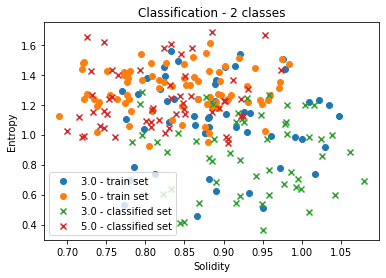

In [6]:
# >>> UZUPEŁNIJ KOMÓRKĘ <<<
def get_grouped_classified_set_dict(classified):
    grouped_dict = {}
    for element in classified:
        if element.value[0] in grouped_dict:
            grouped_dict[element.value[0]].append(element.value)
        else:
            grouped_dict[element.value[0]] = [element.value]
    for key in grouped_dict.keys():
        grouped_dict[key] = np.asarray(grouped_dict[key])
    return grouped_dict


plt.figure()
plt.title("Classification - 2 classes")
plt.xlabel(f"Solidity")
plt.ylabel(f"Entropy")
for k in sorted(grouped_two_classes_train_dict.keys()):
    plt.scatter(x=grouped_two_classes_train_dict[k][:, 5], y=grouped_two_classes_train_dict[k][:, 15], label=str(k) + ' - train set', marker='o')
classified_samples_dict = get_grouped_classified_set_dict(classified_samples)
for k in sorted(classified_samples_dict.keys()):
    plt.scatter(x=classified_samples_dict[k][:, 5], y=classified_samples_dict[k][:, 15], label=str(k) + ' - classified set', marker='x')
plt.legend()

### Zadanie 7

Oblicz dokładność (*Accuracy*) klasyfikacji (stosunek poprawnie zaklasyfikowanych próbek do liczby wszystkich próbek wyrażony procentowo).

$$
\texttt{Accuracy} = \frac{T}{N}
$$

gdzie $T$ - liczba poprawnie zaklasyfikowanych próbek, $N$ - liczba wszystkich próbek.


In [7]:
# >>> UZUPEŁNIJ KOMÓRKĘ <<<
def print_accuracy():
    properly_classified_samples = 0
    for classified_sample in classified_samples:
        if classified_sample.is_properly_classified():
            properly_classified_samples += 1
    print("Accuracy is: " + str(properly_classified_samples / len(classified_samples)))
print_accuracy()

Accuracy is: 0.7


### Zadanie 8

Wybierz 5 dowolnych rodzajów liści (klasy) i przeprowadź eksperyment ponownie.

> Możesz połączyć wszystkie powyższe fragmenty kodu w wkleić w komórkę poniżej zmieniając liczbę klas.

Accuracy is: 0.37987012987012986


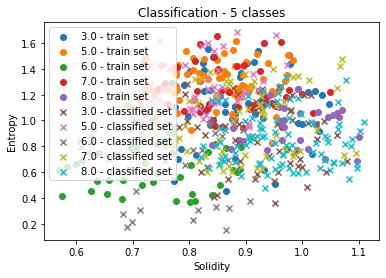

In [8]:
# >>> UZUPEŁNIJ KOMÓRKĘ <<<
train_five_classes = train[((train[:,0] == 3) | (train[:,0] == 5) | (train[:,0] == 6) | (train[:,0] == 7) | (train[:,0] == 8))]
test_five_classes = test[((test[:,0] == 3) | (test[:,0] == 5) | (test[:,0] == 6) | (test[:,0] == 7) | (test[:,0] == 8))]
grouped_five_classes_train_dict = get_grouped_set_dict(train_five_classes)

classify_samples(test_five_classes, train_five_classes, [5, 15])
print_accuracy()

plt.figure()
plt.title("Classification - 5 classes")
plt.xlabel(f"Solidity")
plt.ylabel(f"Entropy")
for k in sorted(grouped_five_classes_train_dict.keys()):
    plt.scatter(x=grouped_five_classes_train_dict[k][:, 5], y=grouped_five_classes_train_dict[k][:, 15], label=str(k) + ' - train set', marker='o')
classified_samples_dict = get_grouped_classified_set_dict(classified_samples)
for k in sorted(classified_samples_dict.keys()):
    plt.scatter(x=classified_samples_dict[k][:, 5], y=classified_samples_dict[k][:, 15], label=str(k) + ' - classified set', marker='x')
plt.legend()

### Zadanie 9

Przeprowadź eksperyment ponownie dla większej liczby cech.

In [9]:
# >>> UZUPEŁNIJ KOMÓRKĘ <<<
classify_samples(test_five_classes, train_five_classes, [5, 15, 6, 7, 8])
print_accuracy()


Accuracy is: 0.6915584415584416


### Zadanie 10

Napisz wnioski z przeprowadzonego eksperymentu.

In [ ]:
"""
<TU NAPISZ WNIOSKI>
Przy większej liczbie klas które bierzemy pod uwagę spada dokładnośc klasyfikacji - wniosek płynący z klasyfikacji 5 klas
przy użyciu 2 cech.

Po zwiększeniu liczby cech do 5 dokładność klasyfikacji znacznie się poprawiła
"""